# 🌟 Introduction

Dataset used in this notebook aims to classificate stars, galaxies, and quasars based on their spectral characteristics. Support Vector Machine (SVM) and Random Forest algorithms are used for classification purposes in this notebook. The dataset is an imbalanced dataset. For this reason, Synthetic Minority Oversampling Technique (SMOTE) is used to eliminate the imbalance between classes. Outlier values are detected with the Local Outlier Factor and these values are removed from the dataset. In the 16-dimensional data set, the correlations of the features with the class label are checked and the features with a correlation greater than 0.16 are used for classification. In addition, the seaborn library and the yellow brick library are used for data visualization.

<img src="https://media2.giphy.com/media/OYfQ5c7FPeBxe/giphy.gif">

### 💫 Content

1. [Cargar y revisar los datos](#1)
1. [Detectar Outliers o Datos atipicos](#2)
1. [Seleccion de Caracteristicas](#3)
1. [Desbalance de Datos](#4)


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

<a id='1'></a><br>
# Cargar y revisar los datos

In [2]:
df = pd.read_csv("data/star_classification.csv")

df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
# informacion basica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

Lo que deseamos predecir eventualmente es la clase, 
- Galaxia
- Estrella
- Quasar

In [4]:
df["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

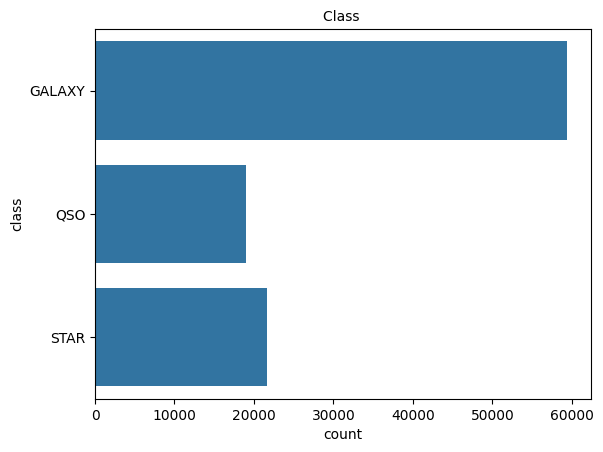

In [5]:
sns.countplot(df["class"])
plt.title("Class ",fontsize=10)
plt.show()

Le entregaremos un numero a cada valor, se puede hacer con if's o un map, el map es una operacion mas elegante y facil de leer, asi que es recomendada

In [6]:
df["class"] = df["class"].map({"GALAXY": 0, "STAR": 1, "QSO": 2})
df["class"].value_counts()

class
0    59445
1    21594
2    18961
Name: count, dtype: int64

<a id='2'></a><br>
# Detectar Outliers
Son aquellos datos que se comportan de manera muy variable, suelen ser una *cantidad muy baja* comparada con el total de datos y sugieren que deben trabajarse con un modelo distinto

Incluirlos puede provocar que nuestro modelo intente generalizarlos cuando los rige un fenomeno distinto, esto provoca que el modelo se envene y empeore su prediccion para los datos que no son `outliers`

`LocalOutlierFactor` es un algoritmo no supervisado, que crea una vecindad de datos y aquellos muy lejanos al comportamiento tipico, son considerados datos atipicos

In [7]:
# Existe mateamtica para predecir outliers, hoy en la era moderna es posible correr unas 3 lineas de codigo
# nota: esta celda puede tomar tiempo en correr

from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df) 

In [8]:
# le asigna un puntjae, cuanto mas negativo, mas probabilidad  de ser un outlier
x_score = clf.negative_outlier_factor_
# creamos un dataframe para contener todos los puntajes
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5                                            
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()


In [9]:
# el index indica cual es un outlier
len(outlier_index)

15256

In [10]:
df.drop(outlier_index, inplace=True) # quita el outlier del lugar

<a id='3'></a><br>
# Feature Selection o Eleccion de Caracteristicas

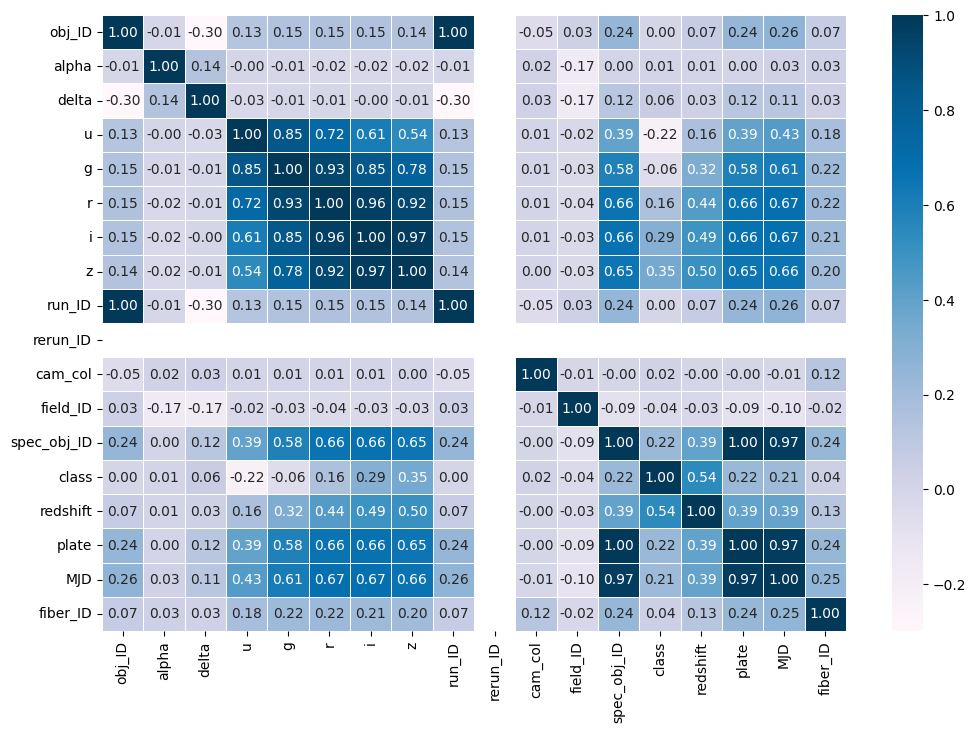

In [11]:
import seaborn as sns
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

Lo que medimos es la correlacion, si un valor aumenta que ocurre con los otros?

Por ejemplo 
- si abro el grifo de agua por un largo tiempo, espero que aumente la cantidad de agua en el balde que deje abajo (una correlacion positiva).


In [12]:
corr = df.corr()
corr

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.007595,-0.298596,0.131724,0.151542,0.154268,0.147686,0.140506,1.000000,NaN,-0.048111,0.032558,0.240267,0.000252,0.066438,0.240267,0.263391,0.067175
alpha,-0.007595,1.000000,0.138266,-0.000401,-0.012023,-0.019830,-0.020549,-0.022386,-0.007597,NaN,0.019790,-0.169471,0.004254,0.008187,0.005316,0.004253,0.026993,0.034421
delta,-0.298596,0.138266,1.000000,-0.029000,-0.007362,-0.006433,-0.003689,-0.005127,-0.298597,NaN,0.029248,-0.168250,0.119294,0.058947,0.033121,0.119294,0.113676,0.028948
u,0.131724,-0.000401,-0.029000,1.000000,0.851703,0.724977,0.614238,0.541793,0.131723,NaN,0.005663,-0.023399,0.393969,-0.222802,0.164270,0.393967,0.434743,0.180359
g,0.151542,-0.012023,-0.007362,0.851703,1.000000,0.932447,0.846505,0.775100,0.151541,NaN,0.005562,-0.032498,0.584472,-0.058192,0.319042,0.584471,0.611249,0.218364
r,0.154268,-0.019830,-0.006433,0.724977,0.932447,1.000000,0.962658,0.918971,0.154266,NaN,0.005945,-0.035651,0.657631,0.160654,0.435026,0.657630,0.673350,0.221695
i,0.147686,-0.020549,-0.003689,0.614238,0.846505,0.962658,1.000000,0.971290,0.147685,NaN,0.005514,-0.034792,0.664511,0.294075,0.494385,0.664510,0.674806,0.213878
z,0.140506,-0.022386,-0.005127,0.541793,0.775100,0.918971,0.971290,1.000000,0.140505,NaN,0.004947,-0.033912,0.647782,0.349711,0.503320,0.647780,0.656364,0.203660
run_ID,1.000000,-0.007597,-0.298597,0.131723,0.151541,0.154266,0.147685,0.140505,1.000000,NaN,-0.048212,0.032558,0.240266,0.000250,0.066438,0.240266,0.263390,0.067162
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Si seleccionamos una columna como

```python
corr["class"]
```

Estaremos observando cuales son las correlaciones con las clases que tenemos

In [13]:
corr["class"].sort_values()

u             -0.222802
g             -0.058192
field_ID      -0.037542
run_ID         0.000250
obj_ID         0.000252
alpha          0.008187
cam_col        0.017789
fiber_ID       0.037319
delta          0.058947
r              0.160654
MJD            0.214433
spec_obj_ID    0.224718
plate          0.224718
i              0.294075
z              0.349711
redshift       0.541667
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

La hipotesis de utilizar las correlaciones:
Correlaciones bajas en magnitud, cercanas a 0 tendran poca importancia para la prediccion de la clase `class`

Puede ser mucho más util que tomemos el cuadrado de la correlacion, de manera que los valores muy cercanos a 0 se aproximen aún más.

- Nota: Observa como hay una correlacion de 1 con `class` pues la correlacion de algo consigo mismo es maxima y perfecta, por tanto no entrega informacion

In [14]:
correlacioncuadrada = corr["class"]**2
correlacioncuadrada

obj_ID         6.326622e-08
alpha          6.702476e-05
delta          3.474713e-03
u              4.964057e-02
g              3.386329e-03
r              2.580971e-02
i              8.648032e-02
z              1.222977e-01
run_ID         6.238597e-08
rerun_ID                NaN
cam_col        3.164481e-04
field_ID       1.409424e-03
spec_obj_ID    5.049811e-02
class          1.000000e+00
redshift       2.934034e-01
plate          5.049827e-02
MJD            4.598133e-02
fiber_ID       1.392735e-03
Name: class, dtype: float64

In [15]:
correlacioncuadrada.drop(["rerun_ID","class"], inplace=True) # botamos la Nan y la propia columna class

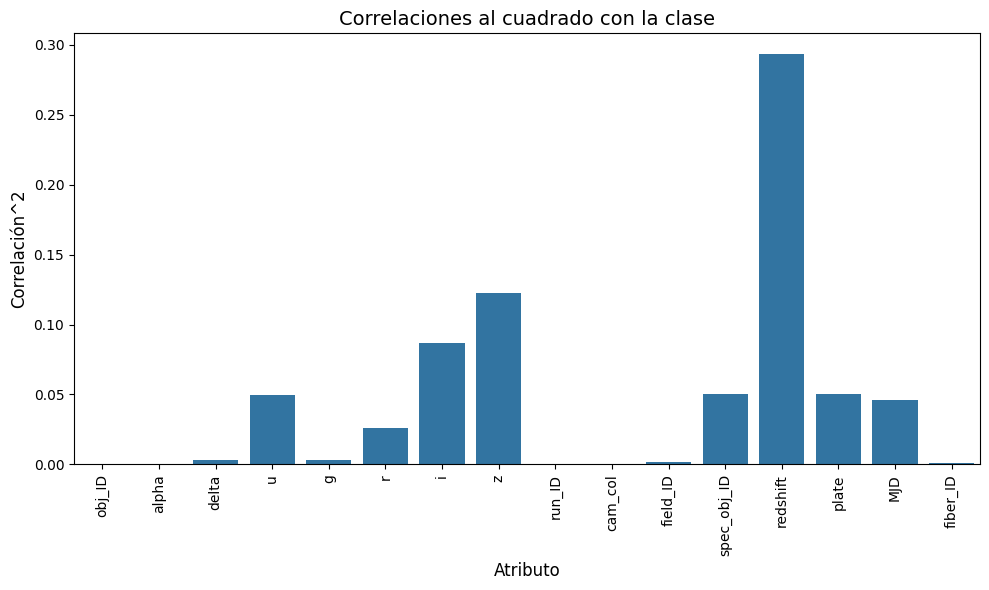

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=correlacioncuadrada.index, y=correlacioncuadrada.values)

# Añadir títulos y etiquetas
plt.title('Correlaciones al cuadrado con la clase', fontsize=14)
plt.xlabel('Atributo', fontsize=12)
plt.ylabel('Correlación^2', fontsize=12)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Explicacion de correlaciones muy bajas
- `obj_ID` es un numero arbitrario y unico para cada objeto en el cielo, ya que no se toma en orden no tienen ninguna influencia con la clase estelar, es como suponer que el numero de telefono permite predcir la profesion de una persona.
- `fiber_ID` tambien es un identificador como el anterior

Las otras correlaciones a 0 podrian tener relaciones `no lineales`, en caso de que por una buena razon sospechemos que estas son muy importantes tendriamos que aplicar metodos de ML no lineales como `redes neuronales` o `arboles de decision`

In [17]:
df = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

## Guardar el dataset trabajado

### Prepararlo en train y testing
Si hacemos metodos como oversampling, al separar en `train` y `test` podemos tener datos repetidos, lo que hara que nuestro metodo para predecir no sea objetivo y se vea sesgado a darnos mejores resultados de lo que en verdad sea

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Divide el DataFrame en train y test (80% entrenamiento, 20% prueba)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)



In [22]:
df_train.head()

,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD
13158,22.39001,22.34083,21.98772,21.76028,21.34358,8.847496e+18,2,1.389701,7858,57281
53959,23.74433,20.75764,19.02456,18.34559,18.11704,5.016017e+18,0,0.345586,4455,55539
54997,23.43193,22.05075,21.92739,21.90023,23.20461,1.032691e+19,1,-0.000509,9172,58015
55717,22.75731,21.47175,21.22910,21.23370,20.79656,7.311744e+18,2,2.598834,6494,56363
30890,20.79732,20.78409,20.70544,20.58816,20.57125,9.223534e+18,2,0.905309,8192,57348


In [23]:
df_test.head()

,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD
19146,22.45291,22.54372,21.92260,21.44131,21.32762,1.076163e+19,0,0.808124,9558,57806
11642,20.11504,18.35507,17.45793,17.02329,16.70585,1.764406e+18,0,0.054056,1567,53172
92293,18.64502,18.61753,18.31365,18.23245,18.21811,3.715536e+18,2,1.363222,3300,54914
790,20.87098,18.33453,17.75295,17.55940,17.52090,3.750344e+17,0,0.284462,333,52313
54358,20.88227,21.05757,20.52429,20.61162,20.40757,9.253922e+18,2,1.287501,8219,57429


<a id='4'></a><br>
# Desbalance de datos

Como observamos antes, tenemos muchos mas casos de Galaxias comparados a los otros 2, esto por lo general provoca que el modelo aproveche esta disparejidad y prediga la mayoria de veces `Galaxia` (0), los modelos son flojos y si encuentran algun truco o atajo, estos seran aprovechados, aun si eso provoca una mala generalizacion

In [19]:
# metodo de sklearn
from sklearn.utils import resample
import pandas as pd
from collections import Counter

In [20]:
# Dividir X e y
x = df_train.drop(['class'], axis=1)
y = df_train['class']

# Combinar los datos para que estén juntos en un DataFrame
data = pd.concat([x, y], axis=1)

# Mostrar el balance original de las clases
print('Dataset original cuentas: %s' % Counter(y))

# Separar las clases
class_0 = data[data['class'] == 0]  # Galaxias (por ejemplo)
class_1 = data[data['class'] == 1]  # Estrellas (por ejemplo)
class_2 = data[data['class'] == 2]  # Quásares (por ejemplo)

# Determinar la clase mayoritaria
max_class_count = max(len(class_0), len(class_1), len(class_2))

# Hacer oversample de las clases minoritarias
class_0_upsampled = resample(class_0, replace=True, n_samples=max_class_count, random_state=42)
class_1_upsampled = resample(class_1, replace=True, n_samples=max_class_count, random_state=42)
class_2_upsampled = resample(class_2, replace=True, n_samples=max_class_count, random_state=42)

# Combinar las clases nuevamente
upsampled_data = pd.concat([class_0_upsampled, class_1_upsampled, class_2_upsampled])

# Separar X e y nuevamente después de hacer el oversampling
x_upsampled = upsampled_data.drop('class', axis=1)
y_upsampled = upsampled_data['class']

# Mostrar el nuevo balance de clases
print('Dataset modificado cuentas: %s' % Counter(y_upsampled))


Dataset original cuentas: Counter({0: 40474, 1: 14349, 2: 12972})
Dataset modificado cuentas: Counter({0: 40474, 1: 40474, 2: 40474})


Como se observa, repetimos muchas veces los datos con menos incidencia para que fueran tantos como la clase mayoritaria.

Ya que deseamos usar estos datos para entrenamiento vamos a almacenarlos como tal en el `csv`

In [24]:
# Guardar los datos en archivos CSV
upsampled_data.to_csv("data/train.csv", index=False)
df_test.to_csv('data/test.csv', index=False)